In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd # data processing

# Futures

A forward contract is an agreement between two parties where one party establishes the price (strike price) of a commodity (such as a stock or bond) for a future date (maturity date). This arrangement is conducted over the counter.

On the other hand, a futures contract, while similar to a forward contract, is executed via an exchange, making it a more secure option. In futures contracts, payoffs are implemented daily, meaning that if the maturity is, for example, after 5 days, the payoff is calculated each day. The party selling the future is referred to as the short position, while the buyer is termed the long position.

A notable distinction from forward contracts is the daily settlement process. Unlike forward contracts where no money changes hands before maturity, in futures contracts, funds are transferred between parties daily based on the evolution of the corresponding future price. To manage these payments, exchanges require the deposit of an initial margin, an initial amount of money, into a margin account. As the future price fluctuates, money is withdrawn or deposited accordingly. The margin account balance must always remain above a predetermined level called the maintenance margin. If it falls below this threshold, the contract holder receives a margin call, necessitating the deposit of additional funds to restore the balance to the initial margin level.

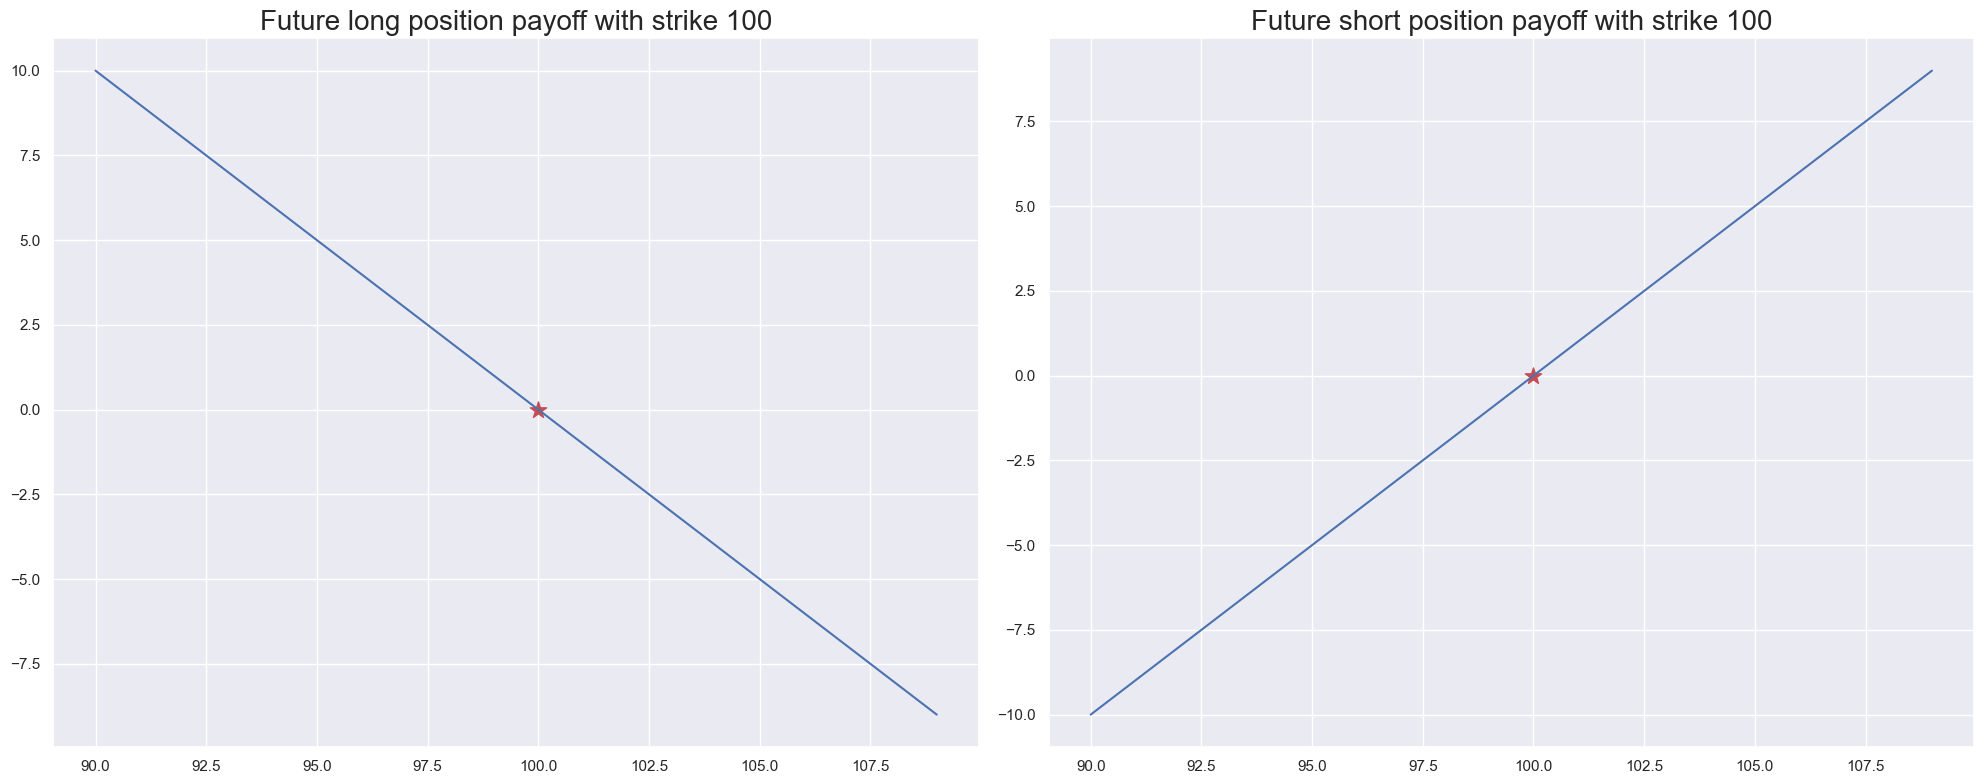

In [2]:
def future_payoff(strike):
    fig, ax = plt.subplots(1,2, figsize=(20,8))
    x = [strike + i for i in range(-10,10)]
    long = [strike - a for a in x]
    short = [-(strike - a) for a in x]
    ax[0].plot(x,long)
    ax[0].scatter(strike,0, marker='*', s=150, c='r')
    ax[0].set_title(f'Future long position payoff with strike {strike}', fontsize=20)
    ax[1].plot(x,short)
    ax[1].scatter(strike,0, marker='*', s=150, c='r')
    ax[1].set_title(f'Future short position payoff with strike {strike}', fontsize=20)
    plt.tight_layout()
future_payoff(100)

In [3]:
def future_long(strike=100, margin=15, maintenance=10, maturity=5):
    '''Let's consider a scenario where we enter a long position in a futures contract that expires in 5 days, 
    and the current futures price is 100€. The initial margin for this trade is 15€, and the maintenance level 
    is set at 10€. 
    
    Now, let's explore the potential changes in the future price over the next 5 days, expressed in euros as outlined below:
    '''
    deposit=margin
    addition_deposit = []
    future_price = np.random.choice([strike + i for i in range(-10,10)], size=maturity)
#     future_price = [101, 104, 89, 90, 90]
    oscilation=[future_price[0]-strike]
    for i in range(1,maturity):
        oscilation.append(future_price[i] - future_price[i-1])
    for i in oscilation:
        deposit += i
        if deposit < maintenance:
            print(f'MARGIN CALL : Deposit is {deposit}')
            addition_deposit.append(15 - deposit)
            deposit = 15
        else:
            continue
    profit = deposit - np.sum(addition_deposit) - margin
    return future_price, oscilation, addition_deposit, profit

future_long()      

(array([103, 109, 108, 100, 106]), [3, 6, -1, -8, 6], [], 6.0)

In [4]:
def future_short(strike=100, margin=15, maintenance=10, maturity=5):
    '''Let's suppose we take a short position in a futures contract expiring in 5 days, 
    and the current futures price is 100€. The initial margin for this trade is 15€, 
    and the maintenance level is set at 10€. 
    Now, consider the anticipated changes in the future price over the next 5 days, presented in euros as outlined below:'''
    deposit=margin
    addition_deposit = []
    future_price = np.random.choice([strike + i for i in range(-10,10)], size=maturity)

#     future_price = [101, 104, 89, 90, 90]
    oscilation=[-(future_price[0]-strike)]
    for i in range(1,maturity):
        oscilation.append(-(future_price[i] - future_price[i-1]))
    for i in oscilation:
        deposit += i
        if deposit < maintenance:
            print(f'MARGIN CALL : Deposit is {deposit}')
            addition_deposit.append(15 - deposit)
            deposit = 15
        else:
            continue
    profit = deposit - np.sum(addition_deposit) - margin
    return future_price, oscilation, addition_deposit, profit

future_short()      

MARGIN CALL : Deposit is 6


(array([ 99,  94, 109,  97, 105]), [1, 5, -15, 12, -8], [9], -5)

Problem with the short is, the loss could be infinite and hence it is a risky game. Unless we know, price is going to fall below strike, we will not short it. Long all you could lose is the strike price.

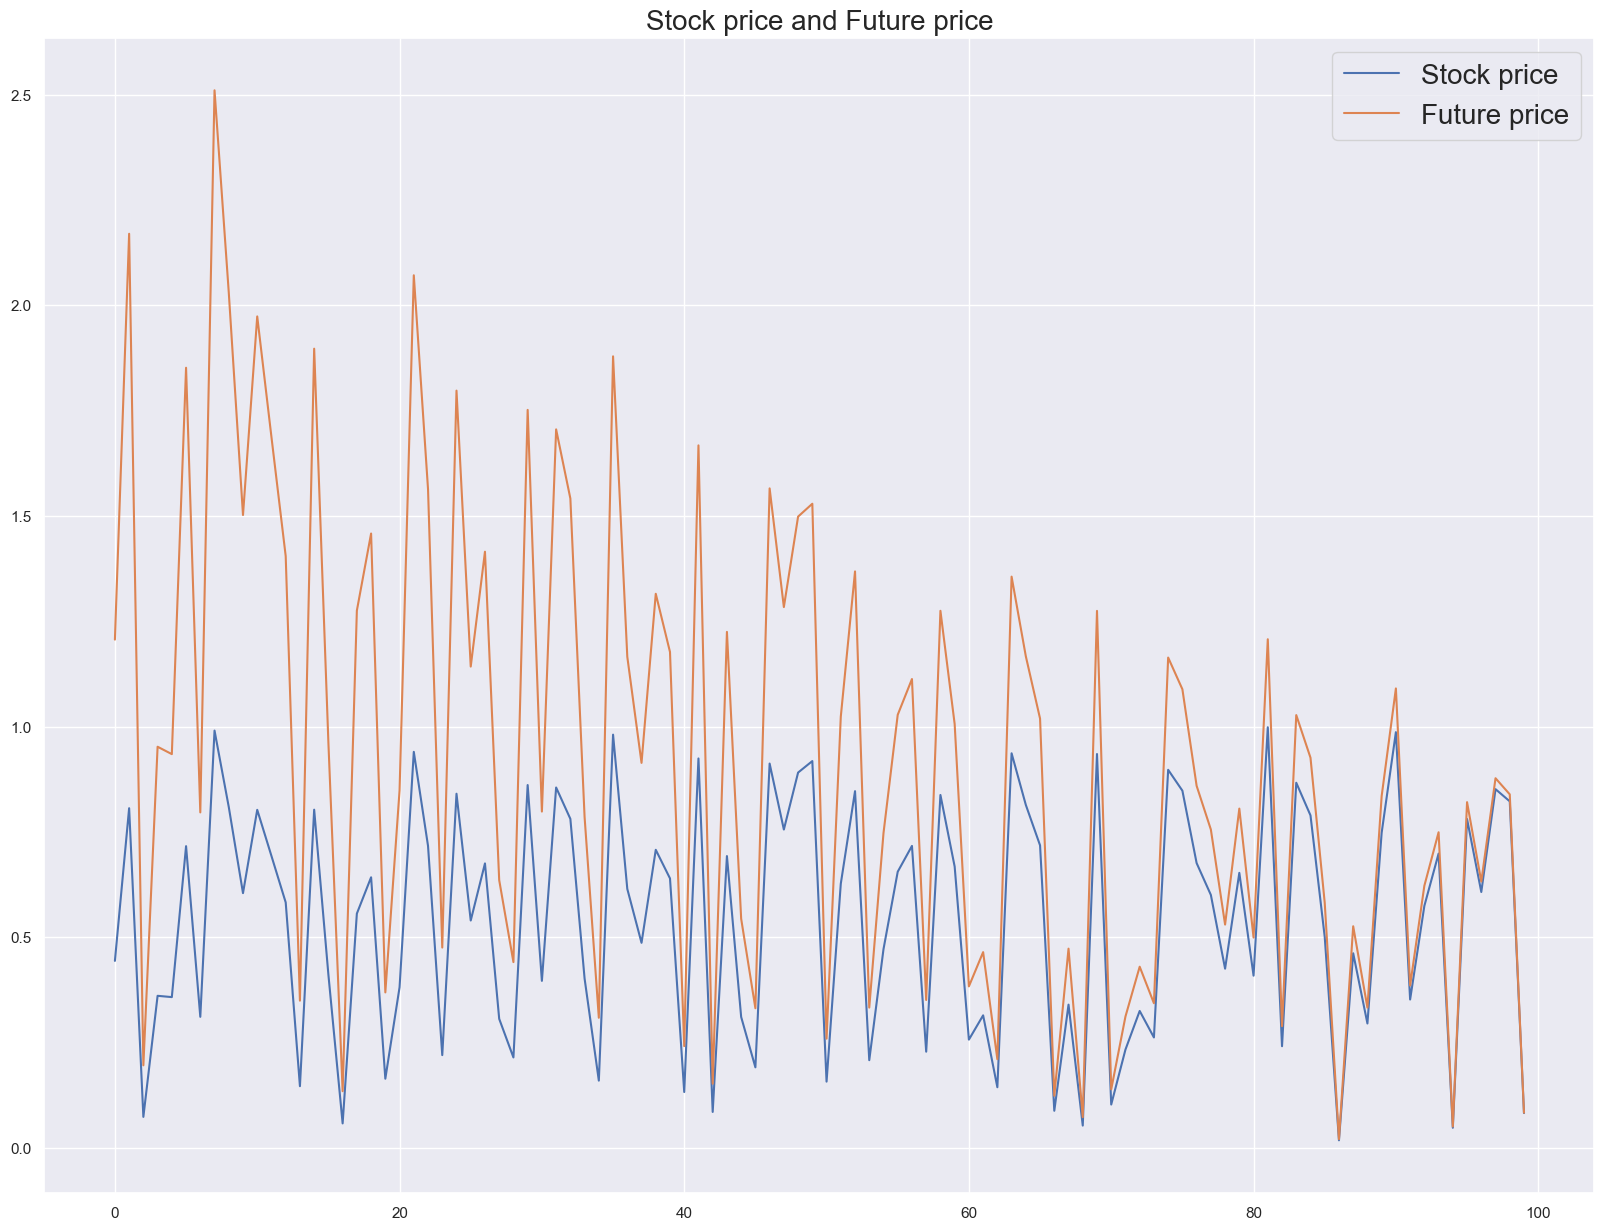

In [5]:
def future_price(stock_price=np.random.random(size=100), r=.01):
    '''compute future price based on stock price for time interval of length 100'''
    future = np.zeros_like(stock_price)
    for i in range(100):
        future[i] = stock_price[i] * np.exp(r * (100-i))
    plt.figure(figsize=(20,15))
    plt.plot(stock_price, label='Stock price')
    plt.plot(future, label='Future price')
    plt.legend(fontsize=20)
    plt.title('Stock price and Future price', fontsize=20)
#     return stock_price.shape, future.shape
future_price()

# We can see the convergence of future and spot prices in this graph.

# OPTIONS

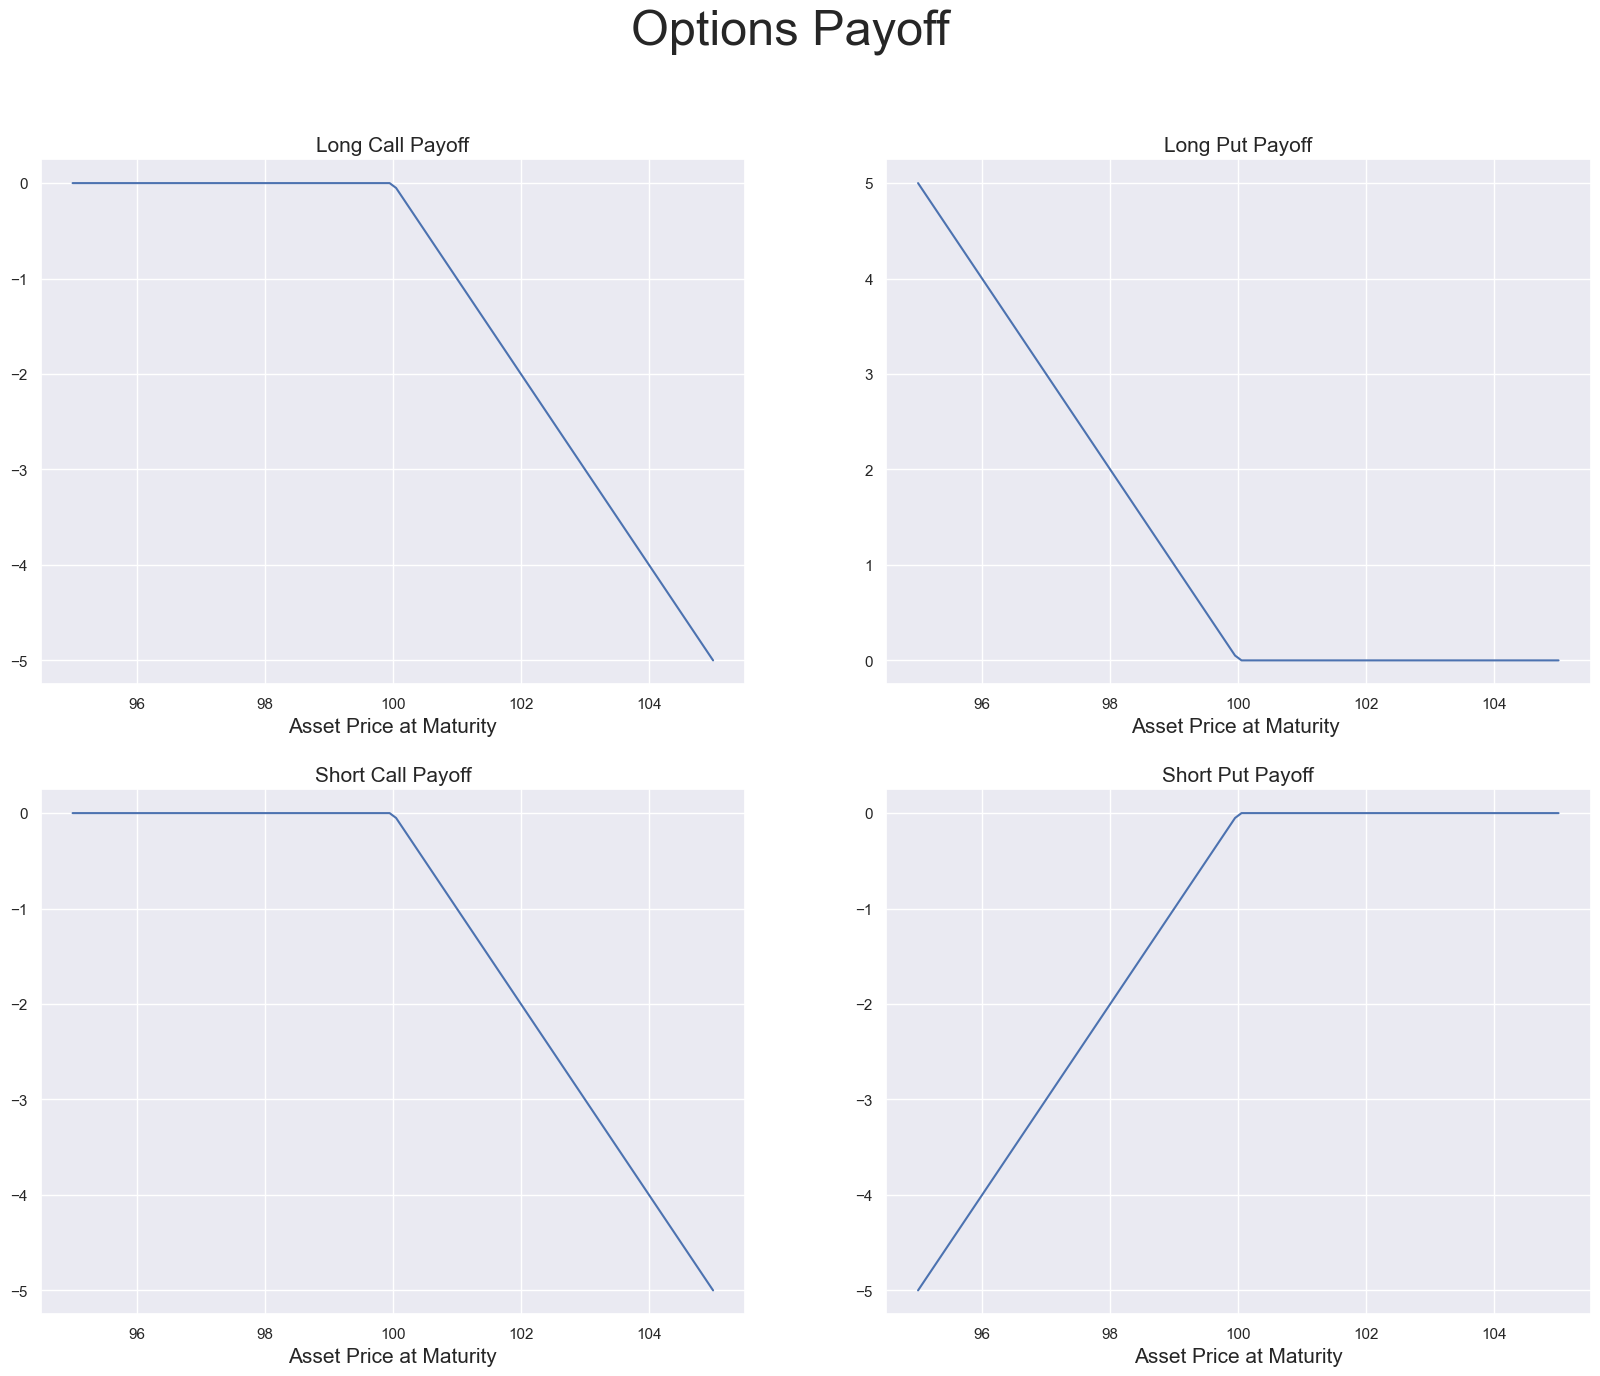

In [6]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
ax = ax.flatten()

# We will keep the strike price to be 100

x = np.linspace(95,105,100)
f = lambda a : 0 if a <= 100 else 100-a
ax[0].plot(x, list(map(f,x)))
ax[0].set_xlabel('Asset Price at Maturity', fontsize=15)
# ax[1].axhline(100, xmin=95, xmax=100)
ax[0].set_title('Long Call Payoff', fontsize=15)

x = np.linspace(95,105,100)
f = lambda a : 100-a if a <= 100 else 0
ax[1].plot(x, list(map(f,x)))
# ax[1].axhline(100, xmin=95, xmax=100)
ax[1].set_title('Long Put Payoff', fontsize=15)
ax[1].set_xlabel('Asset Price at Maturity ', fontsize=15)

x = np.linspace(95,105,100)
f = lambda a : a-100 if a <= 100 else 0
ax[3].plot(x, list(map(f,x)))
# ax[1].axhline(100, xmin=95, xmax=100)
ax[3].set_title('Short Put Payoff', fontsize=15)
ax[3].set_xlabel('Asset Price at Maturity', fontsize=15)



x = np.linspace(95,105,100)
f = lambda a : 0 if a <= 100 else 100-a
ax[2].plot(x, list(map(f,x)))
# ax[1].axhline(100, xmin=95, xmax=100)
ax[2].set_title('Short Call Payoff', fontsize=15)
ax[2].set_xlabel('Asset Price at Maturity', fontsize=15)

# plt.tight_layout()
plt.suptitle('Options Payoff', fontsize=35);

- Option price = INTRINSIC VALUE + TIME VALUE (EXTRINSIC VALUE)
    - IV = DIFFRENCE B/W STOCK PRICE AND STRIKE PRICE
    - TIME VALUE = TIME PERIOD UNTIL MATURITY
    - LONGER THE TIME VALUE, HIGHER CHANCE OF VOLTATILITY AND HENCE HIGHT THE PRICE OF OPTION
- the volatility affects only the time value of an option, and not its intrinsic value

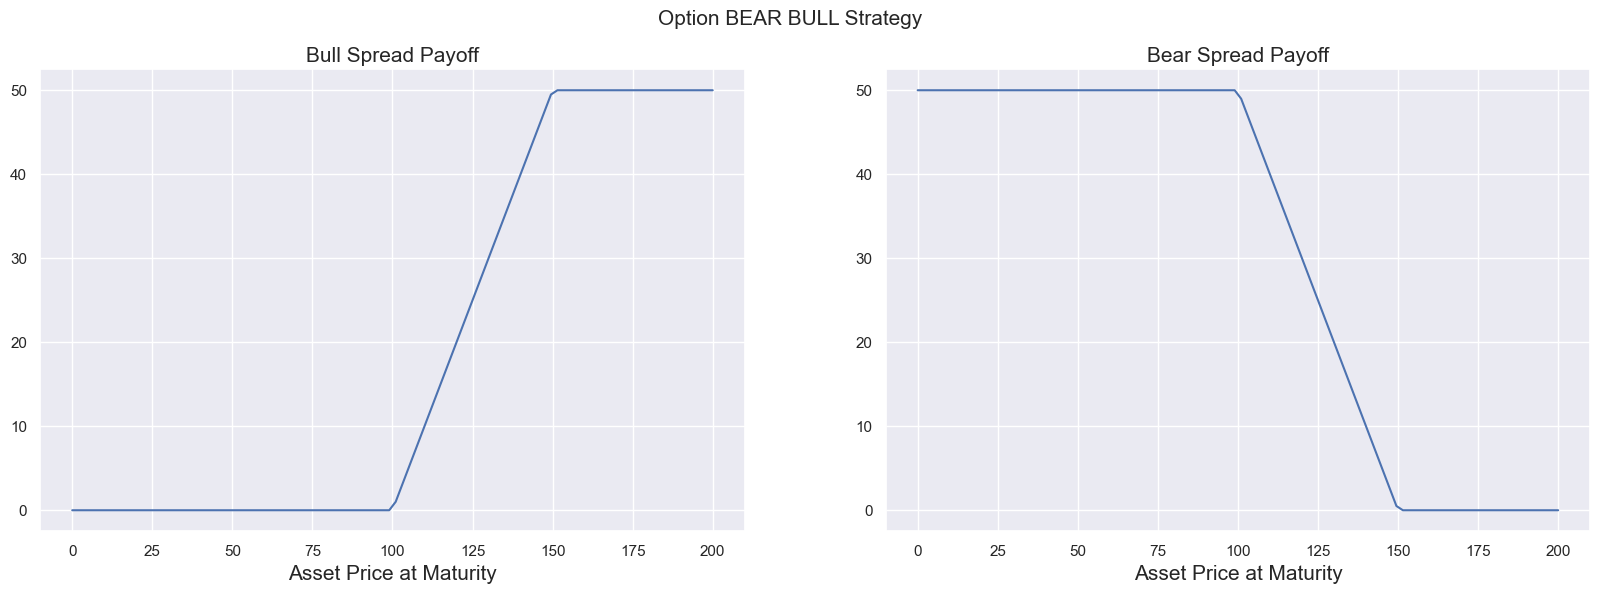

In [7]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
ax = ax.flatten()

# LC (Long call) strike 100 + SC (short call) strike 150
x = np.linspace(0,200,100)
f = lambda x : 0 if x <= 100 else x-100 if x <= 150 else 50
ax[0].plot(x, list(map(f,x)))
ax[0].set_xlabel('Asset Price at Maturity', fontsize=15)
ax[0].set_title('Bull Spread Payoff', fontsize=15)

# LP (Long PUT) strike 150 + SP (short put) strike 100
f = lambda x : 50 if x <= 100 else 150-x if x <= 150 else 0
ax[1].plot(x, list(map(f,x)))
ax[1].set_xlabel('Asset Price at Maturity', fontsize=15)
ax[1].set_title('Bear Spread Payoff', fontsize=15)
plt.suptitle('Option BEAR BULL Strategy', fontsize=15);

# Fowards, Call and put payoffs

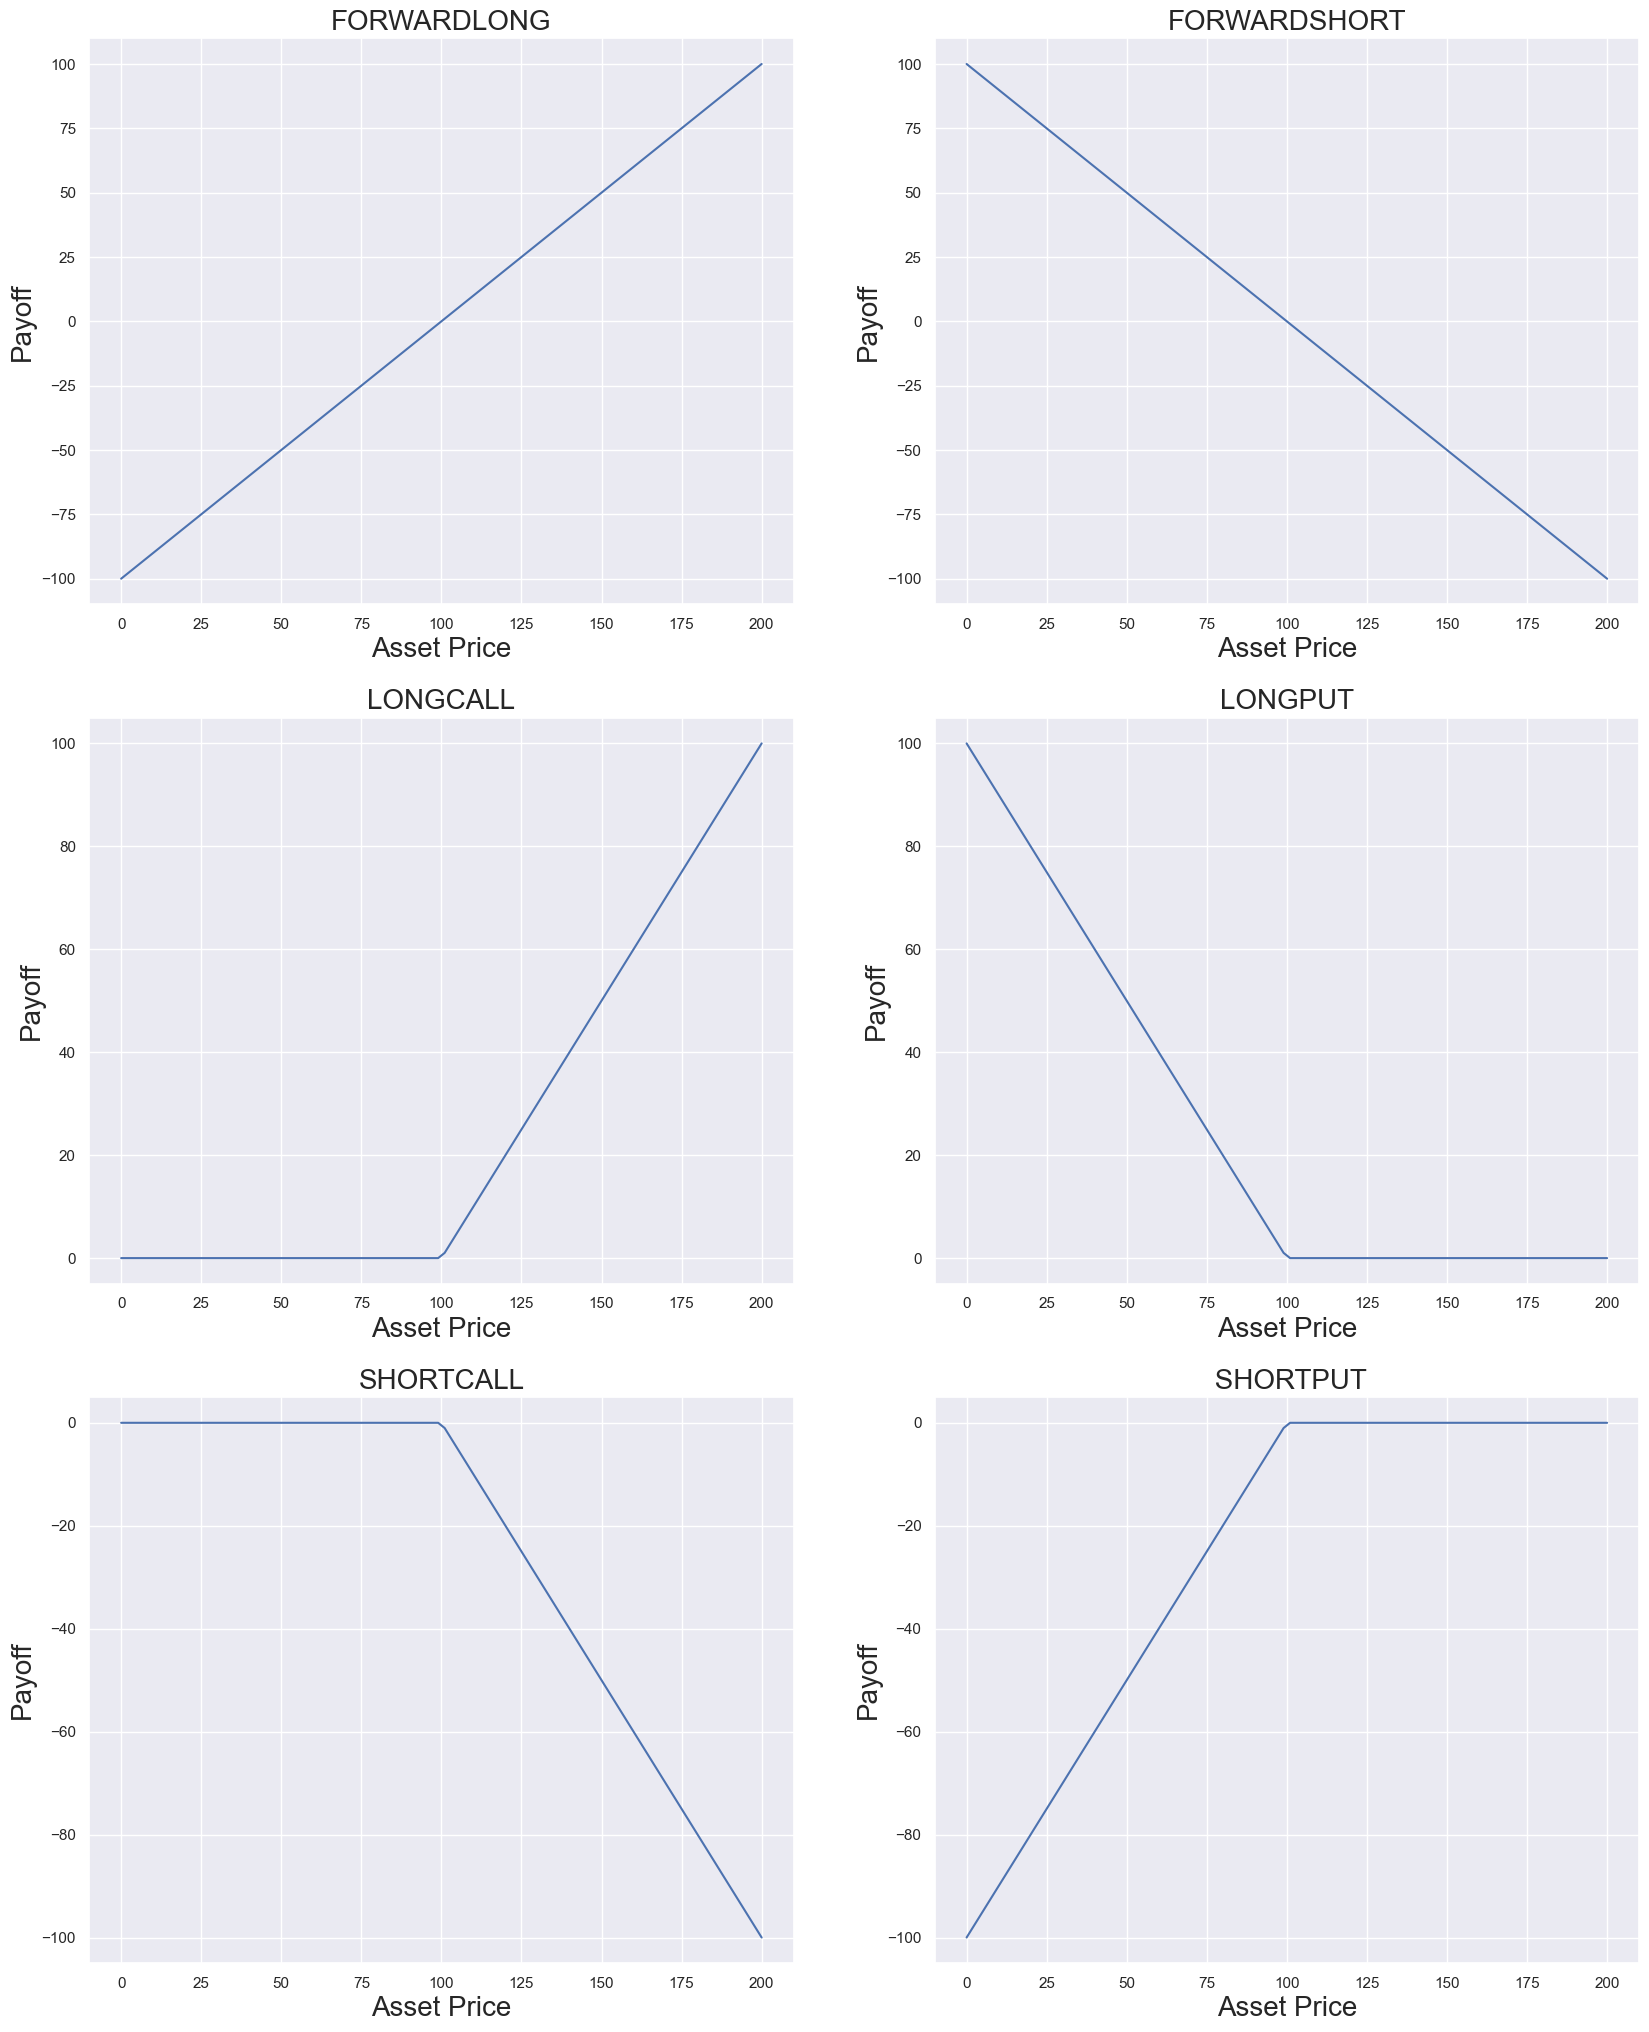

In [8]:
def forwardlong(assetprice, strike=100):
    return assetprice - strike

def forwardshort(assetprice, strike=100):
    return -(assetprice - strike)

def longcall(assetprice, strike=100):
    return np.maximum(assetprice - strike , 0)

def longput(assetprice, strike=100):
    return np.maximum(-(assetprice - strike) , 0)

x = np.linspace(0,200,100)
fig, ax = plt.subplots(3,2, figsize=(20,25))
ax = ax.flatten()

for i, j in enumerate([forwardlong, forwardshort, longcall, longput]):
    ax[i].plot(x, list(map(j,x)))
    ax[i].set_title(f'{j.__name__.upper()}', fontsize=20)
    ax[i].set_xlabel('Asset Price', fontsize=20)
    ax[i].set_ylabel('Payoff', fontsize=20)

short = ['SHORTCALL',' SHORTPUT']
for i, j in enumerate([longcall, longput]):
    ax[4+i].plot(x, -1*np.fromiter(map(j,x), dtype='float'))
    ax[4+i].set_title(f'{short[i]}', fontsize=20)
    ax[4+i].set_xlabel('Asset Price', fontsize=20)
    ax[4+i].set_ylabel('Payoff', fontsize=20)


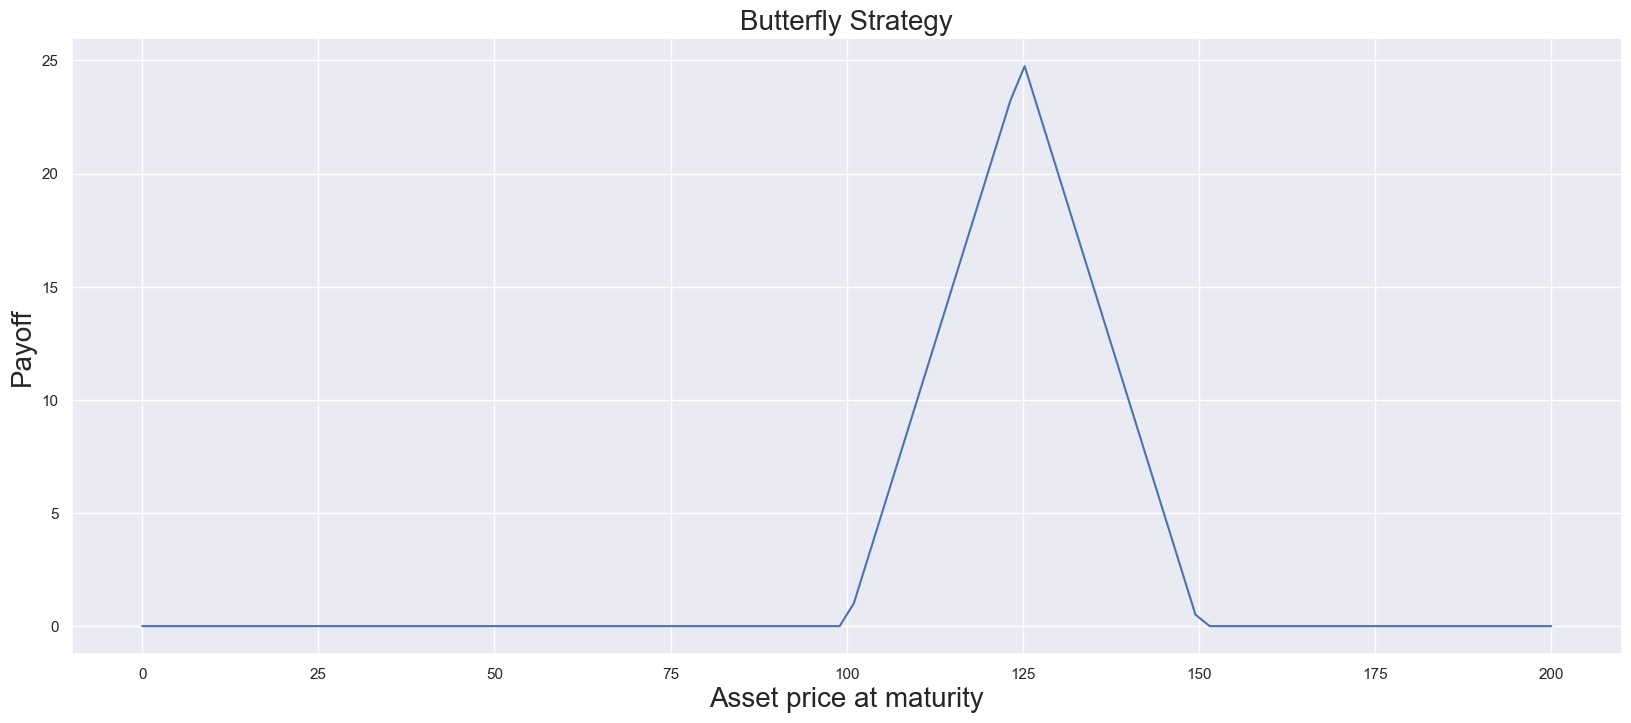

In [9]:
'''A butterfly is a strategy composed of a long call with strike K_1 ,
two short calls with strike K_2 , and a long call with strike K_3 , with
K_2=(K1+K3)/2'''
k1 = 100
k3 = 150
def butterfly(k1=k1, k3=k3):
    plt.figure(figsize=(20,8))
    k2 = (k1 + k3) / 2
    
    x = np.linspace(0,200,100)
    payoff = longcall(x,k1) - 2 * longcall(x,k2) + longcall(x,k3)
    plt.plot(x, payoff)
    plt.xlabel('Asset price at maturity', fontsize=20)
    plt.ylabel('Payoff', fontsize=20)
    plt.title('Butterfly Strategy', fontsize=20);
butterfly()

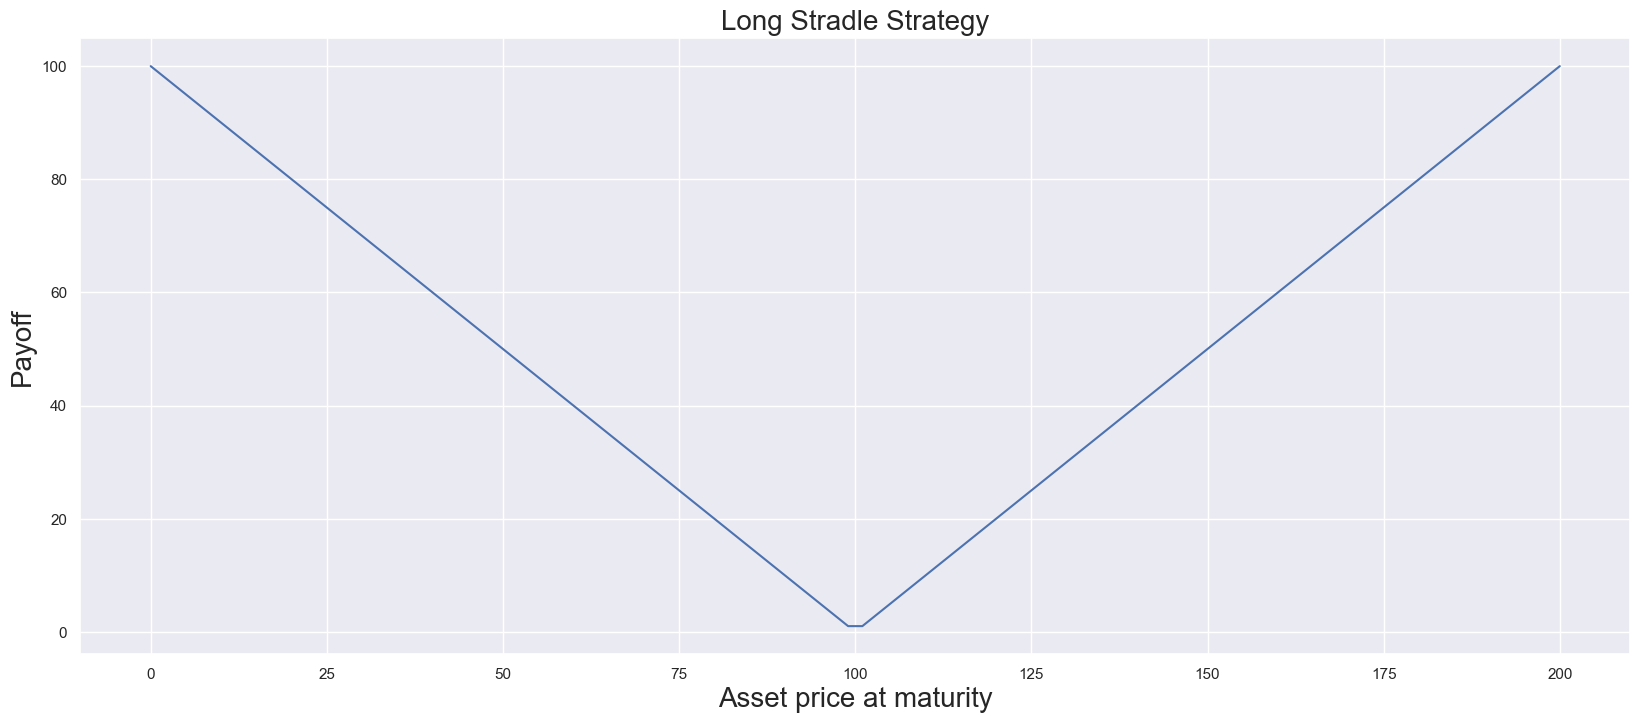

In [10]:
def longstradle(k=100):
    plt.figure(figsize=(20,8))
#     k2 = (k1 + k3) / 2
    
    x = np.linspace(0,200,100)
    payoff = longcall(x,k) + longput(x,k)
    plt.plot(x, payoff)
    plt.xlabel('Asset price at maturity', fontsize=20)
    plt.ylabel('Payoff', fontsize=20)
    plt.title('Long Stradle Strategy', fontsize=20);
longstradle()

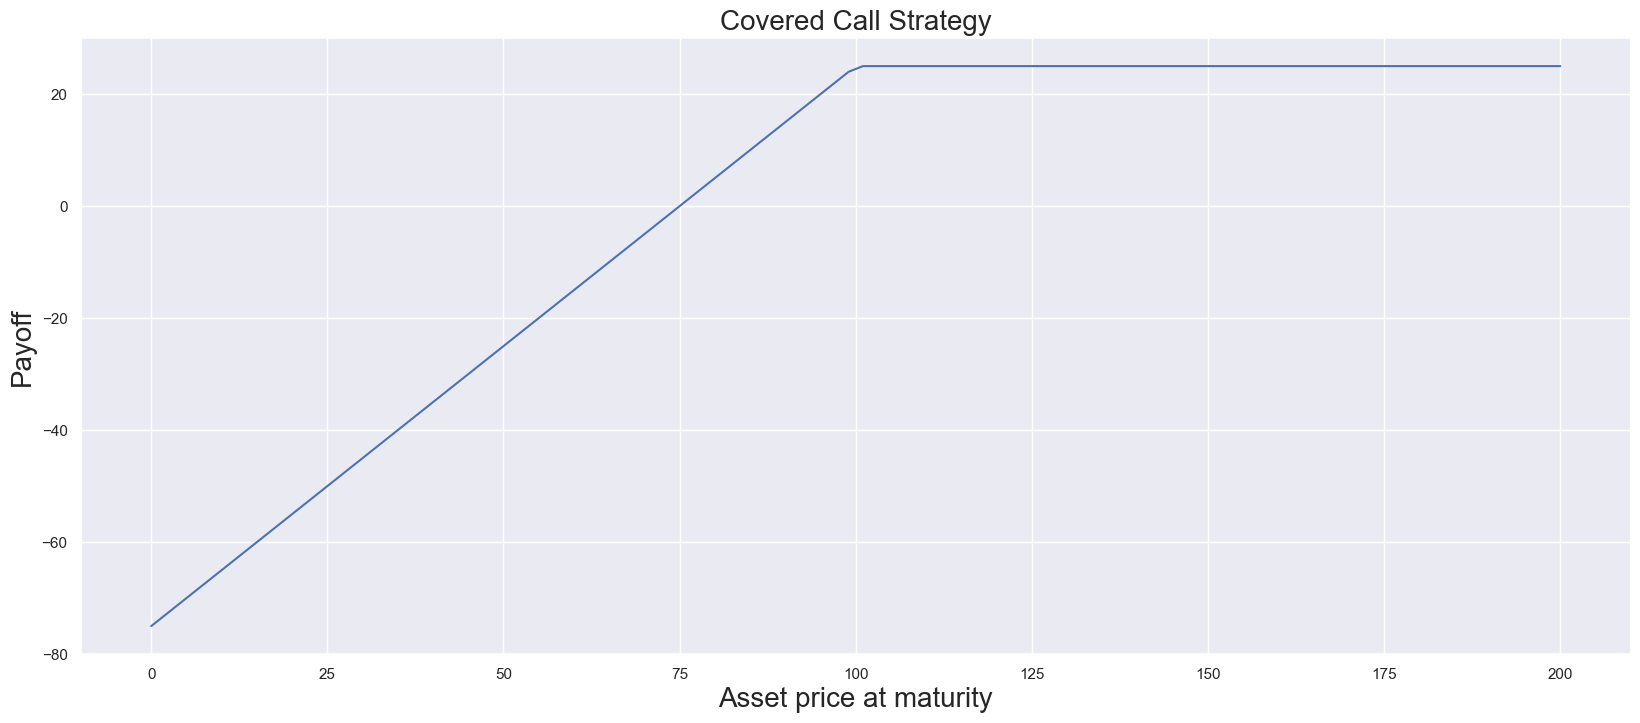

In [11]:
def coveredcall(k=100, stockprice=80, callprice=5):
    plt.figure(figsize=(20,8))
#     k2 = (k1 + k3) / 2
    
    x = np.linspace(0,200,100)
    payoff = lambda x : x - stockprice + callprice if x < k else k - stockprice + callprice
    plt.plot(x, np.fromiter(map(payoff,x), dtype='float'))
    plt.xlabel('Asset price at maturity', fontsize=20)
    plt.ylabel('Payoff', fontsize=20)
#     plt.axhline(25)
    plt.title('Covered Call Strategy', fontsize=20);
coveredcall()

# Pricing vanilla OPTIONS

- What is the price of Call and Puts of an asset with given Strike ?

In [12]:
!pip install option-price


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from optionprice import Option

In [14]:
def call_price_strike(K):
    some_option = Option(european=True,
                        kind='call',
                        s0=100,
                        k=K,
                        t=45,
                        sigma=0.01,
                        r=0.05,
                        dv=0)
    return some_option.getPrice(method='BSM')

def call_price_vol(s):
    some_option = Option(european=True,
                        kind='call',
                        s0=100,
                        k=105,
                        t=45,
                        sigma=s,
                        r=0.05,
                        dv=0)
    return some_option.getPrice(method='BSM')

def call_price_interest(i):
    some_option = Option(european=True,
                        kind='call',
                        s0=100,
                        k=105,
                        t=45,
                        sigma=0.01,
                        r=i,
                        dv=0)
    return some_option.getPrice(method='BSM')

strikes = [101 + i/100 for i in range(10)]
sigmas = [(i+1)/100 for i in range(10)]
interests = [.05 + i/100 for i in range(10)]

call_strike =  [call_price_strike(k) for k in strikes]
call_vol = [call_price_vol(s) for s in sigmas]
call_interest = [call_price_interest(i) for i in interests]

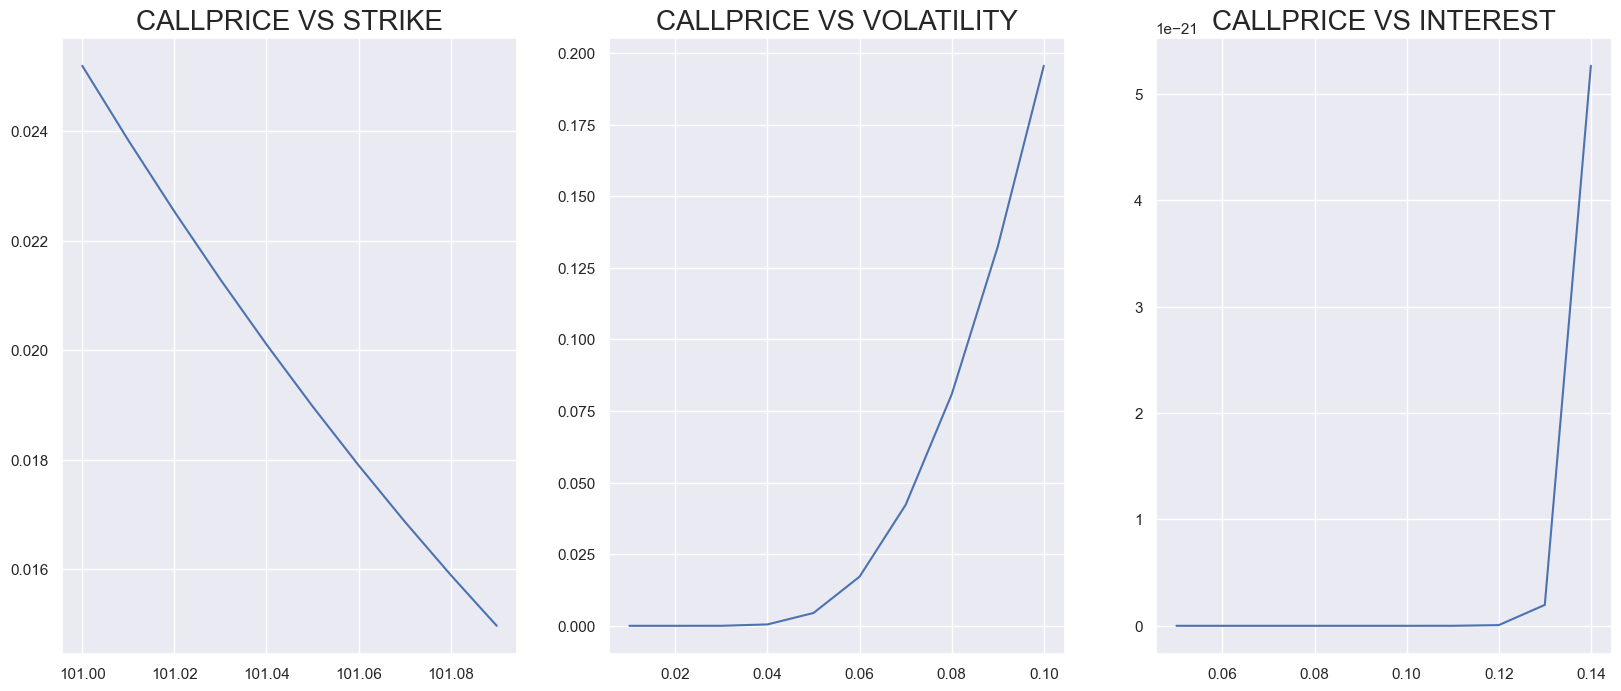

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))
ax = ax.flatten()

titles = ['Callprice VS ' + i for i in 'strike volatility interest'.split()] + \
['PutpriceVS' + i for i in 'strike volatility interest'.split()]

index = 0
for i, j in zip([strikes, sigmas, interests], [call_strike, call_vol, call_interest]):
    ax[index].plot(i, j)
    ax[index].set_title(titles[index].upper(), fontsize=20)
    index += 1

In [16]:
def put_price_strike(K):
    some_option = Option(european=True,
                        kind='put',
                        s0=100,
                        k=K,
                        t=45,
                        sigma=0.01,
                        r=0.05,
                        dv=0)
    return some_option.getPrice(method='BSM')

def put_price_vol(s):
    some_option = Option(european=True,
                        kind='put',
                        s0=100,
                        k=95,
                        t=45,
                        sigma=s,
                        r=0.05,
                        dv=0)
    return some_option.getPrice(method='BSM')

def put_price_interest(i):
    some_option = Option(european=True,
                        kind='put',
                        s0=100,
                        k=95,
                        t=45,
                        sigma=0.01,
                        r=i,
                        dv=0)
    return some_option.getPrice(method='BSM')

strikes = [95 - i/10 for i in range(10)] 

put_strikes =  [put_price_strike(k) for k in strikes]
put_vol = [put_price_vol(s) for s in sigmas]
put_interest = [put_price_interest(i) for i in interests]

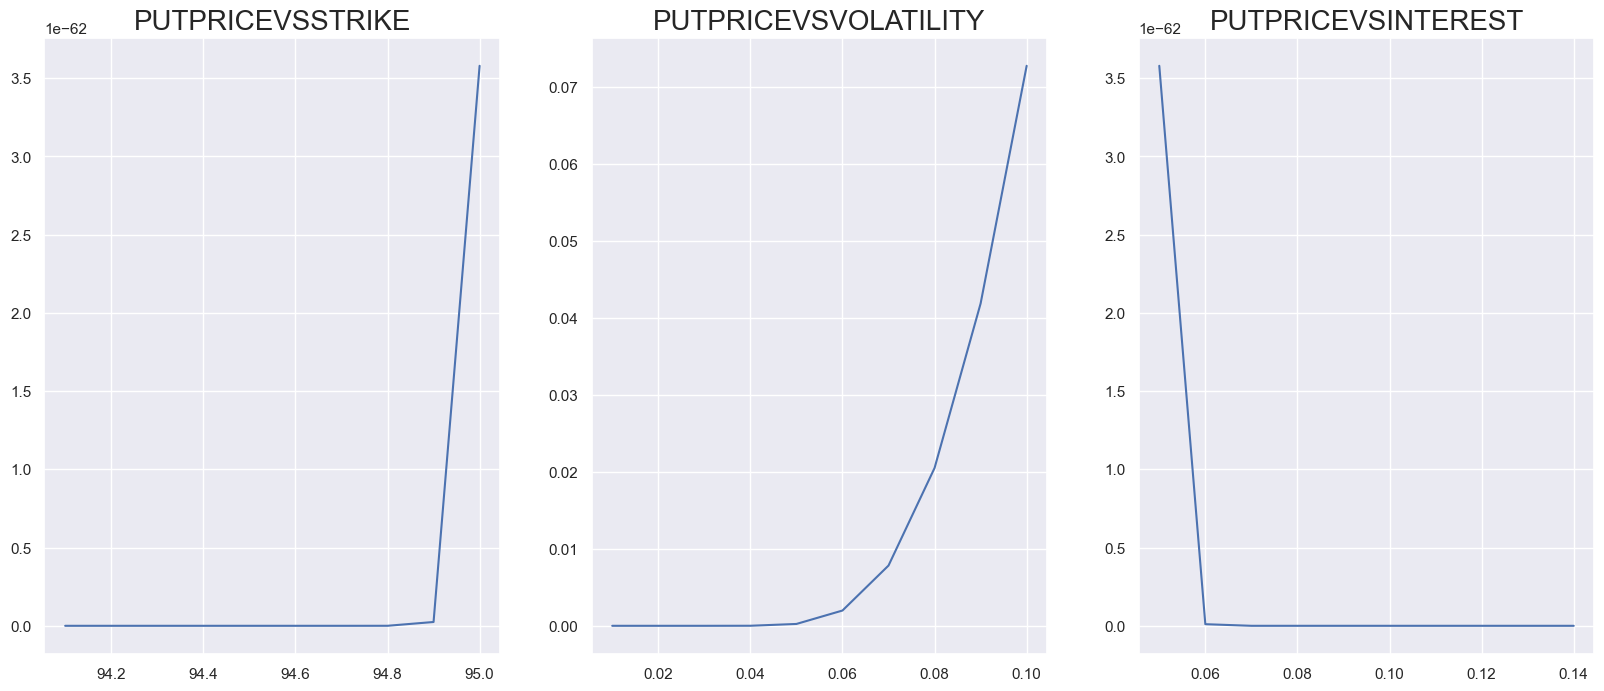

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))
ax = ax.flatten()

index = 0
    
for i, j in zip([strikes, sigmas, interests], [put_strikes, put_vol, put_interest]):
    ax[index].plot(i, j)
    ax[index].set_title(titles[index+3].upper(), fontsize=20)
    index += 1

# Exotic options

In [18]:
threshold = 100

def cashornothing(x):
    return 0 if x < threshold else 30

def assetornothing(x):
    return 0 if x < threshold else x

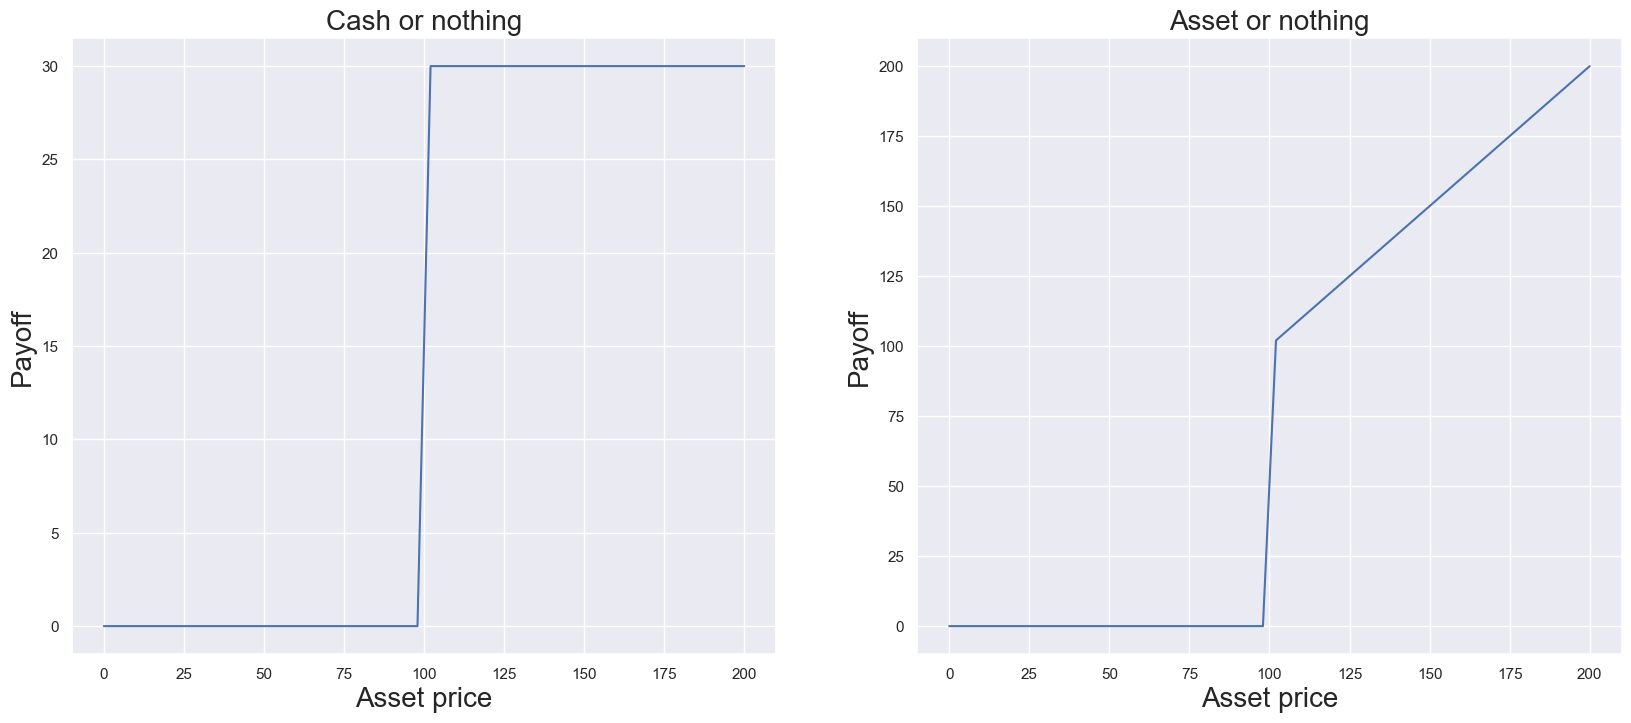

In [19]:
x = np.linspace(0,200)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(x, np.fromiter(map(cashornothing,x), dtype='float'))
plt.title('Cash or nothing', fontsize=20)
plt.xlabel('Asset price', fontsize=20)
plt.ylabel('Payoff', fontsize=20)

plt.subplot(122)
plt.plot(x, np.fromiter(map(assetornothing,x), dtype='float'))
plt.xlabel('Asset price', fontsize=20)
plt.ylabel('Payoff', fontsize=20)
plt.title('Asset or nothing', fontsize=20);
